<a href="https://colab.research.google.com/github/AmirHPartovi/MNIST/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Create Model with ANN for MNIST**

# Import Tensorflow and keras models, layers, dataset

In [48]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as keras

2.18.0


# Load Data


In [49]:
# Load Data
mnist = keras.datasets.mnist
(x_train , y_train), (x_test , y_test) = mnist.load_data()

# Train set & Test set


In [5]:
# Train set & Test set
x_train , x_test = x_train / 255.0 , x_test / 255.0
print("X_train Shape",x_train.shape)

X_train Shape (60000, 28, 28)


# Build Model


In [6]:
# Build Model
model = keras.models.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')

])

#Compile The Model

In [7]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [8]:
# Train the Model
fit = model.fit(x_train, y_train,
                validation_data=(x_test , y_test),
                epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8610 - loss: 0.4828 - val_accuracy: 0.9597 - val_loss: 0.1385
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9558 - loss: 0.1499 - val_accuracy: 0.9699 - val_loss: 0.0966
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1051 - val_accuracy: 0.9723 - val_loss: 0.0882
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9728 - loss: 0.0867 - val_accuracy: 0.9752 - val_loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0721 - val_accuracy: 0.9770 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0619 - val_accuracy: 0.9785 - val_loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9815 - loss: 0.0575 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0492 - 

#Loss Per Iteration

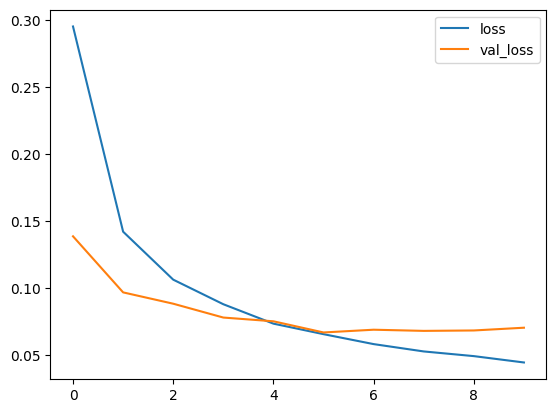

In [9]:
# Plot Los per Iteraton
import matplotlib.pyplot as plt
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

#Accuracy per Iteration



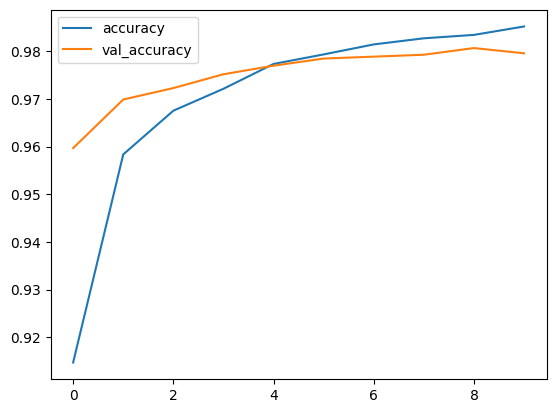

In [10]:
# Plot Accuray per Iteration
plt.plot(fit.history['accuracy'],label='accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Evaluatate the Model

In [11]:
# Evaluatate the Model
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0858


[0.0702204555273056, 0.9796000123023987]

#Confussing Matrix

In [44]:
# Plot Confussing Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    """
    Showing Confusing Matrix Plot
    & Normalization is optional `Normalize =True`
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion matrix, without normalization
[[ 973    0    2    0    0    0    2    0    1    2]
 [   0 1126    0    1    1    1    1    1    4    0]
 [   4    3 1005    5    1    0    2    6    5    1]
 [   2    0    2  982    0   12    0    4    3    5]
 [   0    2    1    0  957    1    6    1    0   14]
 [   2    0    0    2    1  881    2    0    2    2]
 [   8    2    0    1    1    3  941    1    0    1]
 [   1    5    7    0    0    1    0 1006    1    7]
 [   8    1    1    3    2    7    1    6  940    5]
 [   3    3    0    1    5    3    0    6    0  988]]


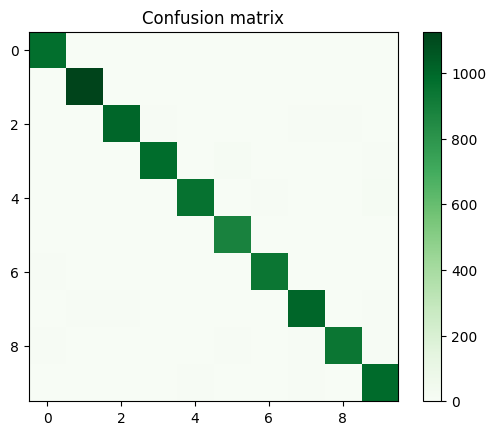

In [47]:
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, classes=class_names)

# Misclassified example

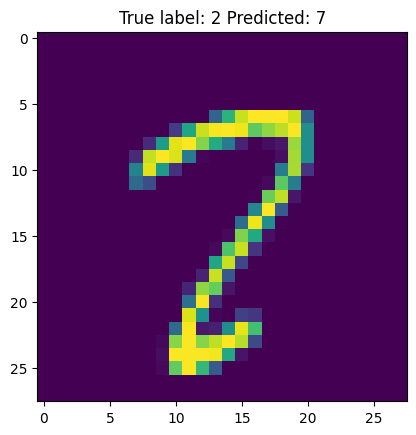

In [46]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));

#**Some Changing Apply to Model (OVERFITTING EXAMPLE)**
***add more dense layer and increase epochs number***

# Build Model To Show How Overfitting appears

In [34]:
# Build Model
model = keras.models.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),## Add Two more Fully Connected Layer
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')

])

# Compile Model (OVERFITTING)

In [35]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Train the Model
fit = model.fit(x_train, y_train,
                validation_data=(x_test , y_test),
                epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9582 - loss: 0.1415 - val_accuracy: 0.9522 - val_loss: 0.1470
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9721 - loss: 0.0922 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0656 - val_accuracy: 0.9729 - val_loss: 0.0932
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9839 - loss: 0.0529 - val_accuracy: 0.9781 - val_loss: 0.0759
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.9688 - val_loss: 0.1119
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0369 - val_accuracy: 0.9771 - val_loss: 0.0821
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9902 - loss: 0.0320 - val_accuracy: 0.9781 - val_loss: 0.0846
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0267 

#Loss Per Iteration (OVERFITTING)

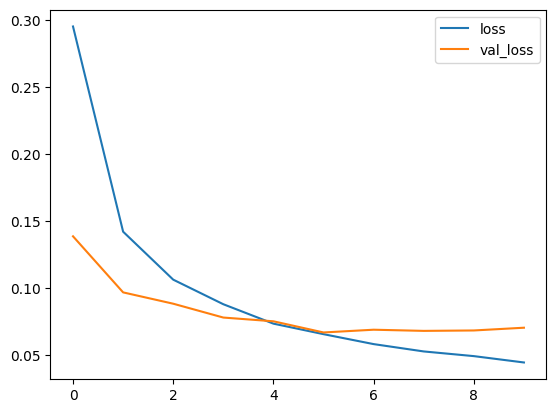

In [ ]:
# Plot Los per Iteraton
import matplotlib.pyplot as plt
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

#Accuracy per Iteration (OVERFITTING)



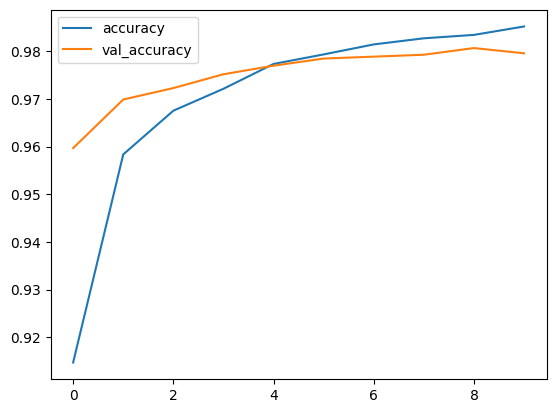

In [ ]:
# Plot Accuray per Iteration
plt.plot(fit.history['accuracy'],label='accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Evaluatate the Model (OVERFITTING)

In [ ]:
# Evaluatate the Model
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0858


[0.0702204555273056, 0.9796000123023987]

#Confussing Matrix (OVERFITTING)

In [ ]:
# Plot Confussing Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    """
    Showing Confusing Matrix Plot
    & Normalization is optional `Normalize =True`
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion matrix, without normalization
[[ 973    0    2    0    0    0    2    0    1    2]
 [   0 1126    0    1    1    1    1    1    4    0]
 [   4    3 1005    5    1    0    2    6    5    1]
 [   2    0    2  982    0   12    0    4    3    5]
 [   0    2    1    0  957    1    6    1    0   14]
 [   2    0    0    2    1  881    2    0    2    2]
 [   8    2    0    1    1    3  941    1    0    1]
 [   1    5    7    0    0    1    0 1006    1    7]
 [   8    1    1    3    2    7    1    6  940    5]
 [   3    3    0    1    5    3    0    6    0  988]]


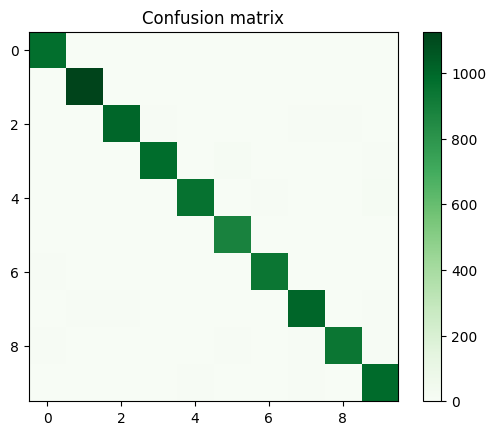

In [ ]:
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, classes=class_names)

# Misclassified example (OVERFITTING)

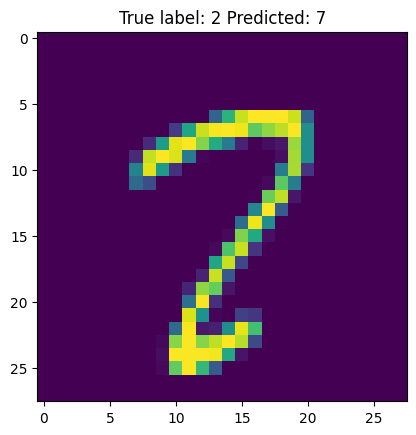

In [ ]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));